# Working of Datablock API(Vision Datasets)

In [1]:
from fastai.vision import *

# Example - 1

In [2]:
path = untar_data(URLs.MNIST_TINY)
tfms = get_transforms(do_flip=False)
path.ls()

[PosixPath('/root/.fastai/data/mnist_tiny/valid'),
 PosixPath('/root/.fastai/data/mnist_tiny/labels.csv'),
 PosixPath('/root/.fastai/data/mnist_tiny/train'),
 PosixPath('/root/.fastai/data/mnist_tiny/test'),
 PosixPath('/root/.fastai/data/mnist_tiny/models')]

In [3]:
import os
os.listdir(path)

['valid', 'labels.csv', 'train', 'test', 'models']

In [4]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/mnist_tiny/train/7'),
 PosixPath('/root/.fastai/data/mnist_tiny/train/3')]

In [5]:
data = ImageDataBunch.from_folder(path,ds_tfms=tfms,size=64)

This is a shortcut method which is aimed at data that is in folders following an ImageNet style, with the train and valid directories, each containing one subdirectory per class, where all the labelled pictures are. There is also a test directory containing unlabelled pictures.

In [6]:
data

ImageDataBunch;

Train: LabelList (709 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
7,7,7,7,7
Path: /root/.fastai/data/mnist_tiny;

Valid: LabelList (699 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
7,7,7,7,7
Path: /root/.fastai/data/mnist_tiny;

Test: None

Here is the same code, but this time using the data block API, which can work with any style of a dataset. All the stages, which will be explained below, can be grouped together like this:

# Method 2:

In [7]:
data = (ImageList.from_folder(path) #Where to find the data? -> in path and its subfolders
        .split_by_folder()              #How to split in train/valid? -> use the folders
        .label_from_folder()            #How to label? -> depending on the folder of the filenames
        .add_test_folder()              #Optionally add a test set (here default name is test)
        .transform(tfms, size=64)       #Data augmentation? -> use tfms with a size of 64
        .databunch())                   #Finally? -> use the defaults for conversion to ImageDataBunch

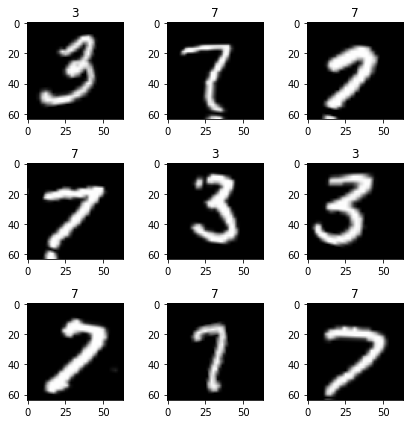

In [8]:
data.show_batch(3,figsize=(6,6),hide_axis=False)

#  Example 2: Planet Dataset

In [10]:
planet = untar_data(URLs.PLANET_TINY)
planet_tfms = get_transforms(flip_vert=True,max_lighting=0.1,max_zoom=1.05,max_warp=0.)

In [11]:
planet

PosixPath('/root/.fastai/data/planet_tiny')

In [12]:
planet.ls()

[PosixPath('/root/.fastai/data/planet_tiny/labels.csv'),
 PosixPath('/root/.fastai/data/planet_tiny/train')]

In [15]:
pd.read_csv(planet/'labels.csv').head()

,image_name,tags
0,train_31112,clear primary
1,train_4300,partly_cloudy primary water
2,train_39539,clear primary water
3,train_12498,agriculture clear primary road
4,train_9320,clear primary


## Method 1: Simple

In [18]:
data = ImageDataBunch.from_csv(planet, folder='train', size=128, suffix='.jpg', label_delim = ' ', ds_tfms=planet_tfms)

In [19]:
pd.read_csv(planet/"labels.csv").head()

,image_name,tags
0,train_31112,clear primary
1,train_4300,partly_cloudy primary water
2,train_39539,clear primary water
3,train_12498,agriculture clear primary road
4,train_9320,clear primary


# Method:2 

In [24]:
data = (
    ImageList.from_csv(planet,'labels.csv',folder='train',suffix='.jpg')
    .split_by_rand_pct()
    .label_from_df(label_delim=' ')
    .transform(planet_tfms,size=128)
    .databunch() )

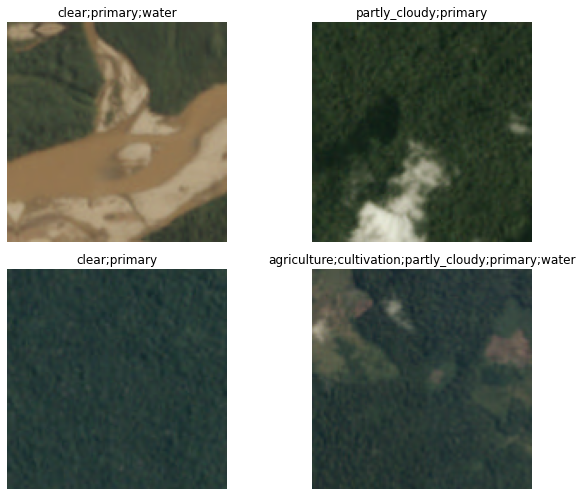

In [25]:
data.show_batch(rows=2,figsize=(9,7))

# Example 3: Image Segementation

In [26]:
camvid = untar_data(URLs.CAMVID_TINY)
path_lbl = camvid/'labels'
path_img = camvid/'images'

In [27]:
codes = np.loadtxt(camvid/'codes.txt', dtype=str); codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')